<a href="https://colab.research.google.com/github/msalazark/Ejercicio-2/blob/master/Revisi%C3%B3n_NLTK_Multiple_Documento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd 
import nltk
# https://www.analyticsvidhya.com/blog/2021/08/text-preprocessing-in-python-getting-started-with-nlp/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [83]:
terminos = pd.read_csv("terminosbuscados.csv", sep= ",")

In [99]:
terminos.tail()

,searchKeyword,searchUniques,searchResultViews
31016,zuly,1,1
31017,"ZUSAK, MARKUS",1,1
31018,zweig,1,1
31019,Zweig,1,1
31020,ZWEIG,1,1


In [113]:
dfwork = pd.DataFrame(terminos['searchKeyword'],terminos['searchUniques'], terminos['searchKeyword'] * terminos['searchUniques'])   

In [120]:
dfwork.head()


# https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/

,-,!!!!!!!!,"¡Ay, mi Tina! - ¡Arre, caballito!",¡Bravazo!,¡Brvaazo!,¡Brvazo!,¡Empieza el cole!,"¡Gracias, Señor Viento!",¡Me enamore...otra vez!,¡Que viva la música!,¡TÓMATE UN RESPIRO!,¿cual es tu papel?,¿Dios existe? El libro que todo creyente deberá (y todo ateo temerá) leer,¿es real la realidad?,¿Jugamos?,"¿Lobo, estás?",¿Puedo soñar contigo?,¿Qué Desastre,¿Qué piensan los que no piensan como yo?,¿Qué significa ser joven?,¿Quién mató a Alex?,¿Quién Mató a Alex?,¿QUIÉN MATÓ A ALEX?,¿Y si fuéramos nosotros?,¿y si quedamos como amigos?,¿Y si quedamos como amigos?¿Y si quedamos como amigos?,.roal dhal,"'El Verdadero Golpe', Manuel Merino",‘Jaime Sabines’,""""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo"""" termino condiciones promo","""alan moore""","""andres ugaz""","""Aves sin nido""""Aves sin nido""","""CIFUENTES, ROSA MARÍA""","""Cómo desarrollar la Inteligencia Emocional"" de Paz TORRABADELLA","""David Fischman""","""ERNST H. GOMBRICH""","""Estupidez Emocional - Lo que necesita saber para protegerse de ella y superarla.""","""FENOMENOLOGÍA DEL ESPÍRITU""","""Gaby Pérez Islas",...,Zero to oneZero to one,zeropoint,Zeropoint,Zeta,zhuangzi,Ziega,Zig,Zig ziglairZig ziglair,zimbardo,zizeck,zizekzizek,Zizek,ZIZEKZIZEK,zodiac,zodiacozodiacozodiaco,Zodiaco,Zodiacos,"ZOLA, ÉMILEZOLA, ÉMILE",zombie,ZombieZombieZombieZombie,Zombies,zombies marvel,Zombies para niños,zona stephen king,zonas azules,zonas erroneas,zoología,Zoom Andrea ferrari,Zootecnia,Zorra,Zorras,zorro,Zorro,zorro isabel allende,Zuli - Por la Serpentina de la Inociencia,zuly,"ZUSAK, MARKUS",zweig,Zweig,ZWEIG
searchUniques,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
dfwork.dtype()

AttributeError: ignored

In [117]:
# dfwork.head()

In [ ]:
pretext = df searchKeyword 

In [49]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
text_doc = pd.read_csv("documentos.csv", sep= ";")

In [73]:
text_doc

,doc_id,text
0,1,Document 1 – Natural Language Processing (NLP)...
1,2,Document 2 – Google has trained its search eng...
2,3,Document 3 – Origination of Natural Language P...
3,4,Document 4 – NLP is actively used for a variet...
4,5,Document 5 – Acronym NLP is used for both Natu...


In [74]:
from nltk.tokenize import sent_tokenize
# breaking every document into sentences
doc_w_sent = [sent_tokenize(text) for text in text_doc.text]
# creating document ID & sentence ID for reference
doc_num_list = [[x] * y for x, y in zip(text_doc.doc_id, [len(doc) for doc in doc_w_sent])]
sentence_num_list = [list(range(1, len(doc)+1)) for doc in doc_w_sent]
# un-nesting lists
doc_w_sent = [x for element in doc_w_sent for x in element]
doc_num_list = [x for element in doc_num_list for x in element]
sentence_num_list = [x for element in sentence_num_list for x in element]
# creating dataframe
text_data = pd.DataFrame({'Document ID' : doc_num_list, 'Sentence ID' : sentence_num_list, 'Text' : doc_w_sent})
print(text_data)

    Document ID  Sentence ID                                               Text
0             1            1  Document 1 – Natural Language Processing (NLP)...
1             1            2  We are already interacting with such machines ...
2             1            3  But do Machines really understand human langua...
3             1            4                 Yes, they can be trained to do so!
4             2            1  Document 2 – Google has trained its search eng...
5             2            2  Google’s search engine has the capability of \...
6             2            3  Google’s “state-of-the-art” search engine is o...
7             3            1  Document 3 – Origination of Natural Language P...
8             3            2  Today, NLP has expanded beyond these two langu...
9             4            1  Document 4 – NLP is actively used for a variet...
10            5            1  Document 5 – Acronym NLP is used for both Natu...
11            5            2  Neuro-Ling

In [75]:
import nltk
pos_tag = [nltk.pos_tag(nltk.word_tokenize(sent)) for sent in text_data.Text]
print(pos_tag)

[[('Document', 'NNP'), ('1', 'CD'), ('–', 'NNP'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('field', 'NN'), ('within', 'IN'), ('Artificial', 'JJ'), ('Intelligence', 'NNP'), ('(', '('), ('AI', 'NNP'), (')', ')'), ('that', 'WDT'), ('is', 'VBZ'), ('concerned', 'VBN'), ('with', 'IN'), ('how', 'WRB'), ('computers', 'NNS'), ('deal', 'VBP'), ('with', 'IN'), ('human', 'JJ'), ('language', 'NN'), ('.', '.')], [('We', 'PRP'), ('are', 'VBP'), ('already', 'RB'), ('interacting', 'VBG'), ('with', 'IN'), ('such', 'JJ'), ('machines', 'NNS'), ('in', 'IN'), ('our', 'PRP$'), ('day-to-day', 'JJ'), ('life', 'NN'), ('in', 'IN'), ('the', 'DT'), ('form', 'NN'), ('of', 'IN'), ('IVRs', 'NNP'), ('&', 'CC'), ('chat-bots', 'NNS'), ('.', '.')], [('But', 'CC'), ('do', 'VBP'), ('Machines', 'NNS'), ('really', 'RB'), ('understand', 'VBP'), ('human', 'JJ'), ('language', 'NN'), (',', ','), ('context', 'NN'), (',', ','), ('syntax', '

In [66]:
punctuation = "!”#$%&'()*+,-./:;?@[]^_`{|}~"

In [76]:
import re
text_data.Text = [re.sub('['+punctuation+']', ' ', sent) for sent in text_data.Text]
[print(sent) for sent in text_data.Text]

Document 1 – Natural Language Processing (NLP) is a field within Artificial Intelligence (AI) that is concerned with how computers deal with human language.
We are already interacting with such machines in our day-to-day life in the form of IVRs & chat-bots.
But do Machines really understand human language, context, syntax, semantics, etc.?
Yes, they can be trained to do so!
Document 2 – Google has trained its search engine to make autofill recommendations as text is typed using NLP.
Google’s search engine has the capability of 	understanding the meaning of words depending on the context in the search.
Google’s “state-of-the-art” search engine is one of the most sophisticated examples of NLP.
Document 3 – Origination of Natural Language Processing dates back to the II world war when there was a need for machine translation between Russian & English.
Today, NLP has expanded beyond these two languages and can deal with most languages, including sign language.
Document 4 – NLP is actively

[None, None, None, None, None, None, None, None, None, None, None, None]

In [77]:
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words('english'))
stopwords_all = "("+') | ('.join([s for s in stop_words])+")"
text_data.Text = [re.sub(stopwords_all,' ',sent) for sent in text_data.Text]
[print(sent) for sent in text_data.Text]

Document 1 – Natural Language Processing (NLP) a field within Artificial Intelligence (AI) is concerned how computers deal human language.
We already interacting such machines our day-to-day life the form IVRs & chat-bots.
But Machines really understand human language, context, syntax, semantics, etc.?
Yes, can trained do so!
Document 2 – Google trained search engine make autofill recommendations text typed using NLP.
Google’s search engine the capability 	understanding meaning words depending the context the search.
Google’s “state-of-the-art” search engine one the sophisticated examples NLP.
Document 3 – Origination Natural Language Processing dates back the II world war there a need machine translation Russian & English.
Today, NLP expanded beyond two languages can deal most languages, including sign language.
Document 4 – NLP actively used a variety day-to-day activities like spam detection, recruitment, smart assistants, understanding customer behaviour & on…… Usage impact NLP gro

[None, None, None, None, None, None, None, None, None, None, None, None]

In [59]:
import re
#text_data.Text = [re.sub(r's+|t+|n+|r+|f+',' ',sent).strip() for sent in text_data.Text]
[print(sent) for sent in text_data.Text]

Docume   1 – Na u al La guage P oce i g (NLP) a  ield wi hi  A  i icial I  ellige ce (AI) i  co ce  ed how compu e   deal huma  la guage.
We al eady i  e ac i g  uch machi e  ou  day- o-day li e  he  o m IVR  & cha -bo  .
Bu  Machi e   eally u de   a d huma  la guage, co  ex ,  y  ax,  ema  ic , e c.?
Ye , ca    ai ed do  o!
Docume   2 – Google   ai ed  ea ch e gi e make au o ill  ecomme da io    ex   yped u i g NLP.
Google’   ea ch e gi e  he capabili y 	u de   a di g mea i g wo d  depe di g  he co  ex   he  ea ch.
Google’  “  a e-o - he-a  ”  ea ch e gi e o e  he  ophi  ica ed example  NLP.
Docume   3 – O igi a io  Na u al La guage P oce i g da e  back  he II wo ld wa   he e a  eed machi e   a  la io  Ru ia  & E gli h.
Today, NLP expa ded beyo d  wo la guage  ca  deal mo   la guage , i cludi g  ig  la guage.
Docume   4 – NLP ac ively u ed a va ie y day- o-day ac ivi ie  like  pam de ec io ,  ec ui me  ,  ma   a i  a   , u de   a di g cu  ome  behaviou  & o …… U age impac  NLP g owi g

[None, None, None, None, None, None, None, None, None, None, None, None]

In [78]:
# roll up cleansed sentences at document level
text_doc_cleansed = text_data.groupby('Document ID')['Text'].apply(list)
text_doc_cleansed = [' '.join(doc) for doc in text_doc_cleansed]
print(text_doc_cleansed)

['Document 1 –\xa0Natural Language Processing (NLP) a field within Artificial Intelligence (AI) is concerned how computers deal human language. We already interacting such machines our day-to-day life the form IVRs & chat-bots. But Machines really understand human language, context, syntax, semantics, etc.? Yes, can trained do so!', 'Document 2 –\xa0Google trained search engine make autofill recommendations text typed using NLP. Google’s search engine the capability \tunderstanding meaning words depending the context the search. Google’s “state-of-the-art” search engine one the sophisticated examples NLP.', 'Document 3 –\xa0Origination Natural Language Processing dates back the II world war there a need machine translation Russian & English. Today, NLP expanded beyond two languages can deal most languages, including sign language.', 'Document 4 –\xa0NLP actively used a variety day-to-day activities like spam detection, recruitment, smart assistants, understanding customer behaviour & o

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()
countvectors = countvectorizer.fit_transform(text_doc_cleansed)
countfeature_names = countvectorizer.get_feature_names()
countdense = countvectors.todense()
countdenselist = countdense.tolist()
count_df = pd.DataFrame(countdenselist, columns=countfeature_names)
print(count_df)

   acronym  across  actively  activities  ai  ...  wide  within  words  world  yes
0        0       0         0           0   1  ...     0       1      0      0    1
1        0       0         0           0   0  ...     0       0      1      0    0
2        0       0         0           0   0  ...     0       0      0      1    0
3        0       1         1           1   0  ...     1       0      0      0    0
4        1       0         0           0   0  ...     0       0      0      0    0

[5 rows x 117 columns]


In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
tfidfvectors = tfidfvectorizer.fit_transform(text_doc_cleansed)
tfidffeature_names = tfidfvectorizer.get_feature_names()
tfidfdense = tfidfvectors.todense()
tfidfdenselist = tfidfdense.tolist()
tfidf_df = pd.DataFrame(tfidfdenselist, columns=tfidffeature_names)
print(tfidf_df)

    acronym    across  actively  ...     words     world      yes
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.14785
1  0.000000  0.000000  0.000000  ...  0.124707  0.000000  0.00000
2  0.000000  0.000000  0.000000  ...  0.000000  0.189336  0.00000
3  0.000000  0.198071  0.198071  ...  0.000000  0.000000  0.00000
4  0.151116  0.000000  0.000000  ...  0.000000  0.000000  0.00000

[5 rows x 117 columns]


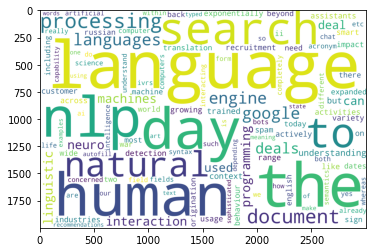

In [81]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(tfidf_df.T.sum(axis=1))
plt.imshow(wordcloud)